<a href="https://colab.research.google.com/github/RubenCedillo123/Machine-Learning/blob/main/CedilloRuben_T06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

* Lista de todas las librerias usadas en esta práctica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Cargar Datos

In [ ]:
dataset = load_wine()
df = pd.DataFrame(data=dataset["data"], columns=dataset["feature_names"])
df["target"] = dataset["target"]

In [ ]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

# Trabajo en Clase (Exploración de los Datos)

* **Preguntas**
  * ¿Cuántos registros están disponibles?
    * Tenemos 178 vinos análisados en 14 covariables (2492 datos)
  
  * ¿De que tipo son las variables?
    * Sus variables todas son de tipo flotante y para 'target' enteros.
  
  * ¿Cual es sus valores medios y otros de análisis de estadística básica?
    * Mediante df.decribe() respondemos esta cuestión:

In [ ]:
print(df.describe().T, '\n')
print('Tipo de datos de cada variable:', '\n')
print(df.dtypes)

                              count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.7825   
od280/od315_of_diluted_wines

* Cuántos elementos contiene cada clase de ”target”?
  * Para la clase 0:
    * 59 vinos
  * Para la clase 1:
    * 71 vinos
  * Para la clase 2:
    * 48 vinos

In [ ]:
df['target'].value_counts(sort=False)

target
0    59
1    71
2    48
Name: count, dtype: int64

* ¿Es un problema balanceado?
  * Dado a que la brecha más grande entre clases es de 23 datos (clases 1 y 2), se trata de un problema desbalanceado minimamente (pues la brecha no es tan grande).

* Matriz de gráficos de dispersión:

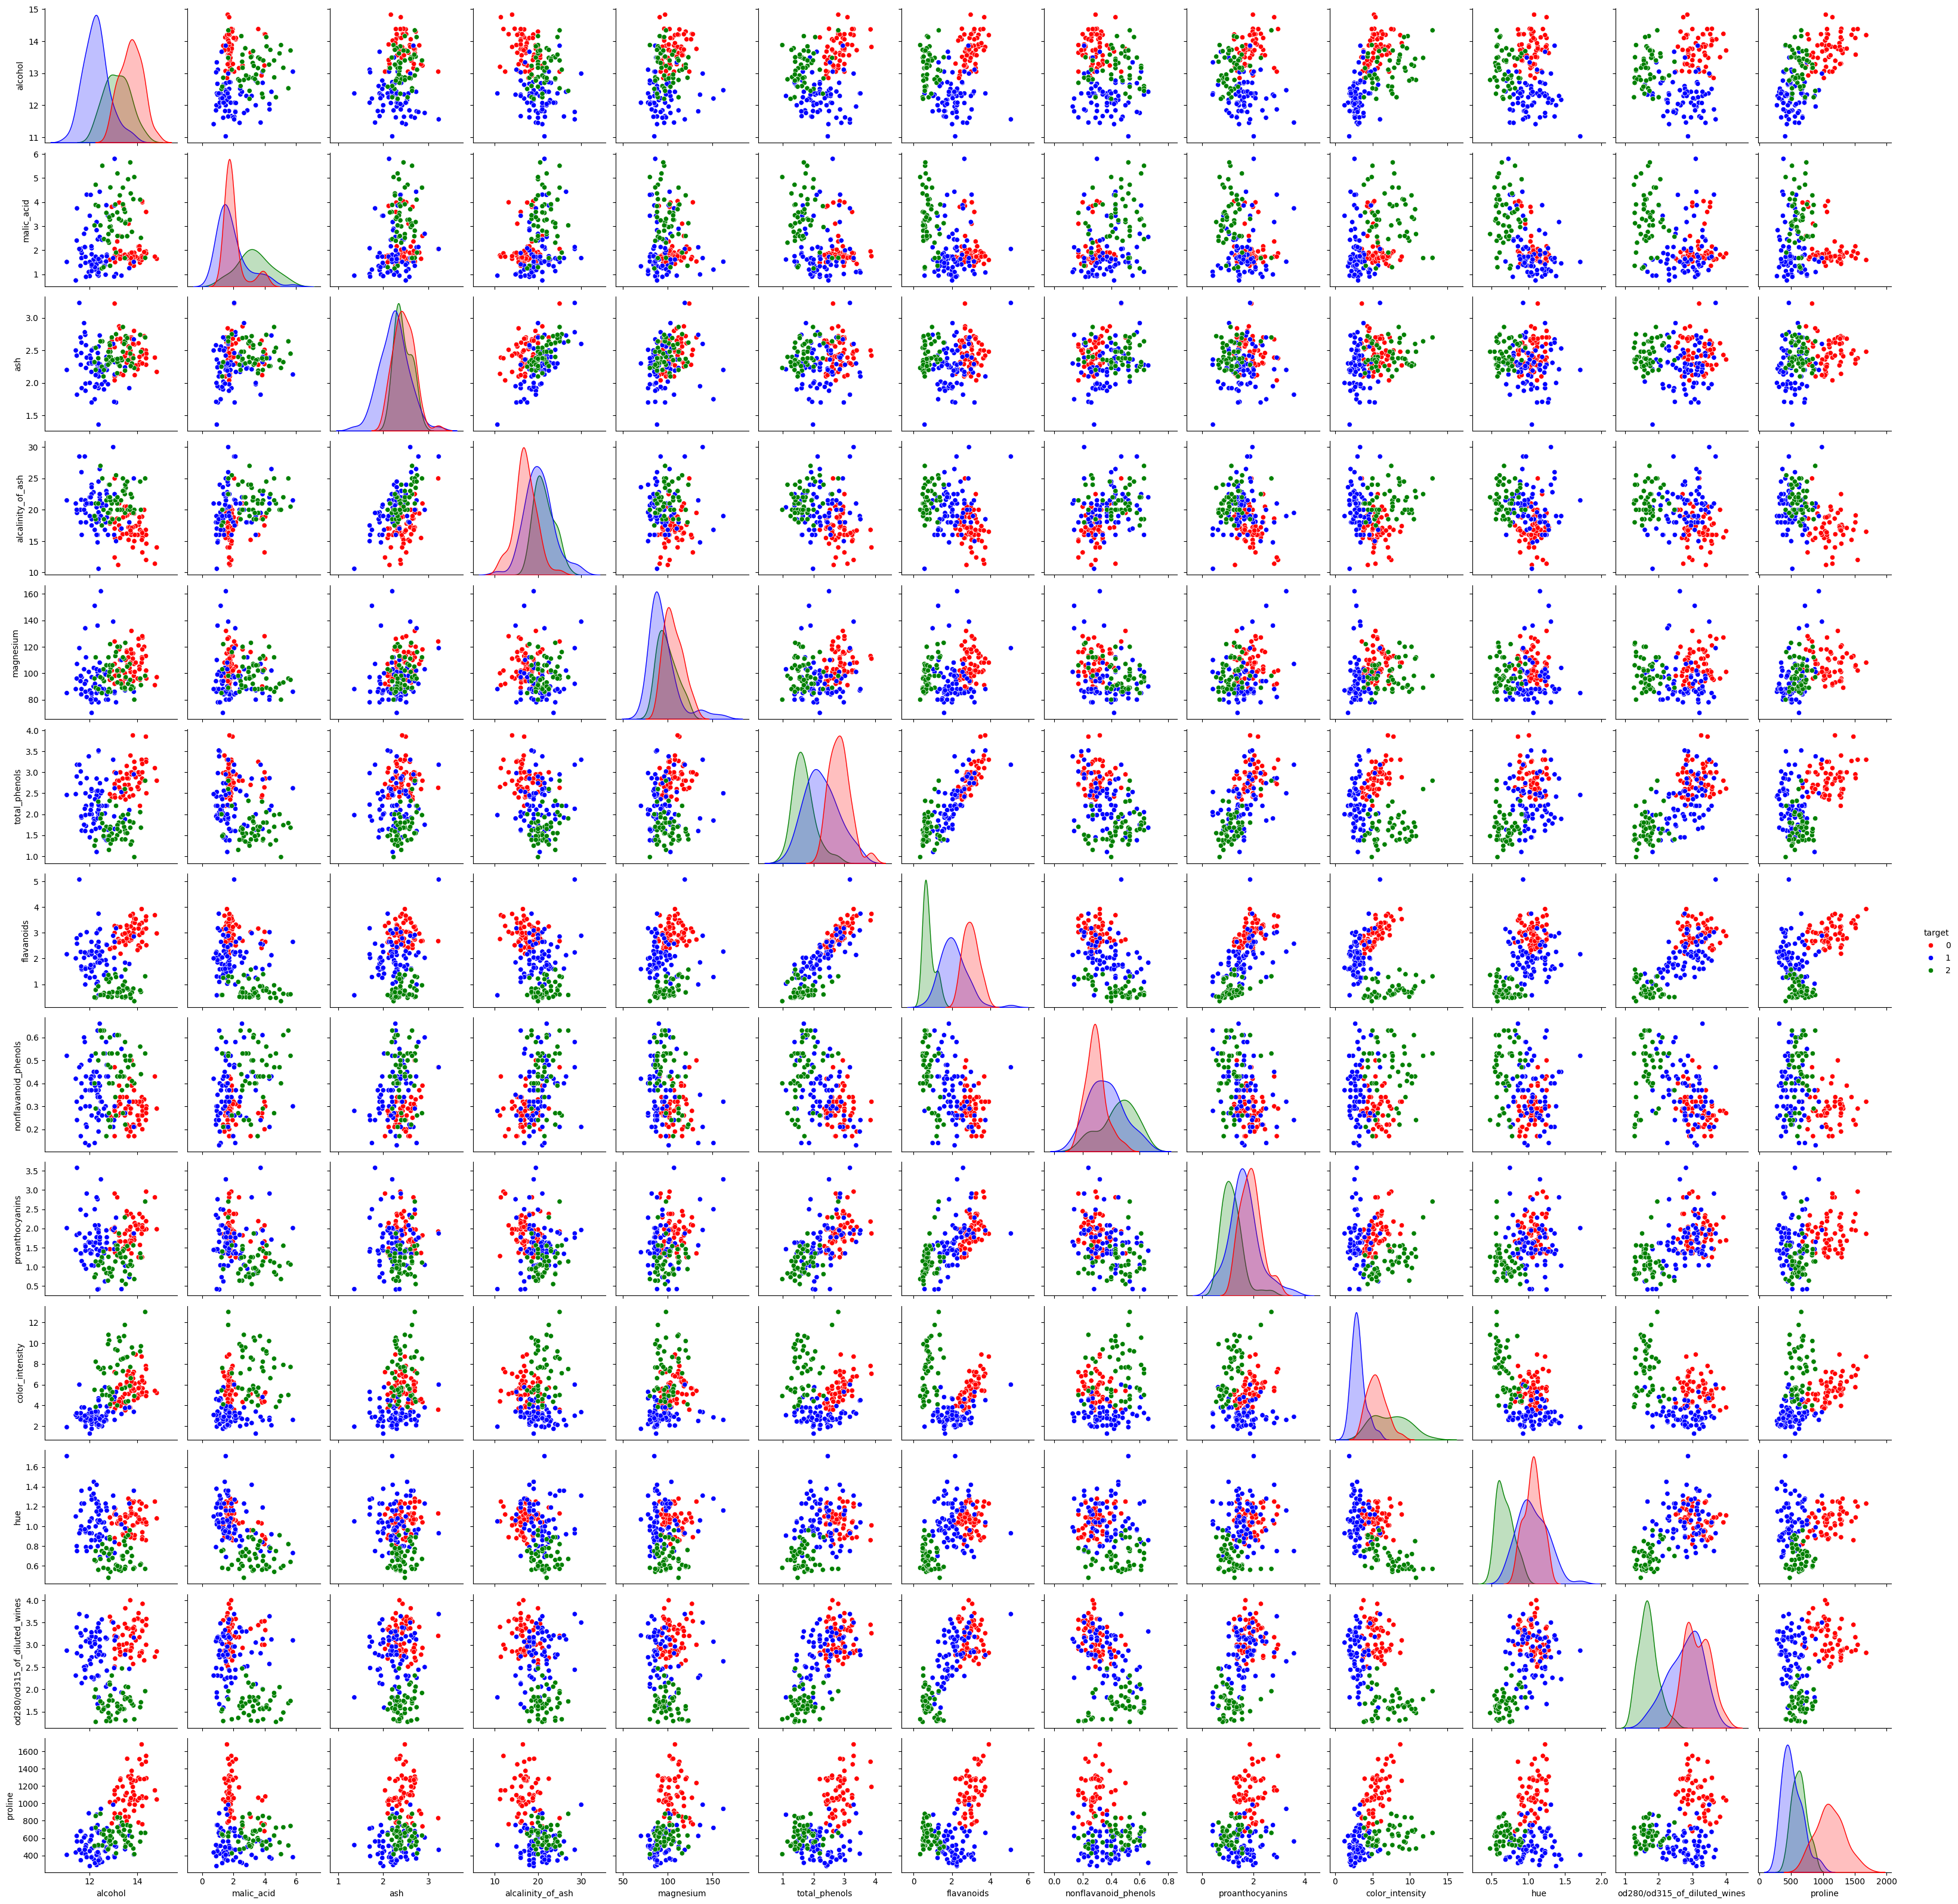

In [ ]:
custom_palette = {0: "red", 1: "blue", 2: "green"}
sns.pairplot(df, hue="target", palette=custom_palette)
plt.show()

* Correlaciones entre datos:

<Axes: >

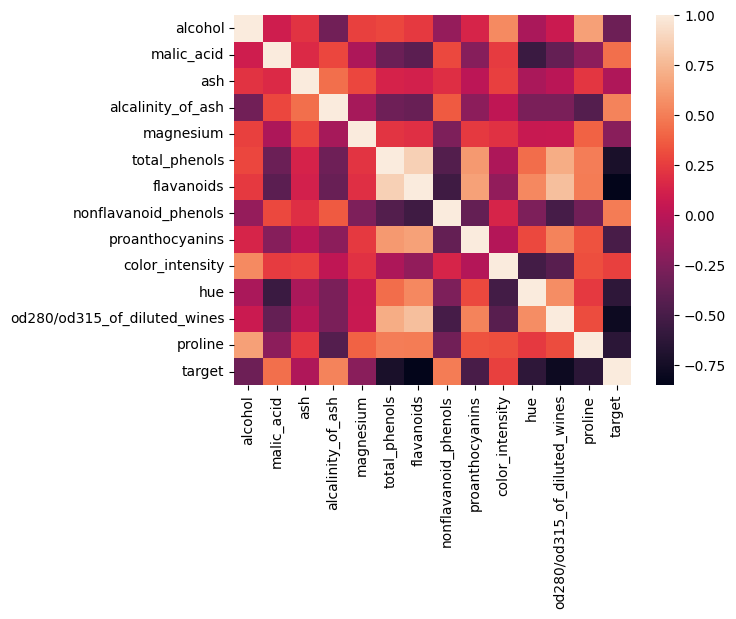

In [ ]:
sns.heatmap(df.corr())

* Es importante recordar que:
  * 1: Correlación perfecta (una varaible aumenta la otra también)
  * 0: No existe correlación alguna entre las variables (no hay variación entre variables relacionada)
  * -1 Correlación negativa perfecta (una aumenta, la otra disminuye)

# Trabajo en Clase (Árboles de Decisión)

* Creamos nuestro primer árbol

In [ ]:
X = dataset["data"]
y = dataset["target"]
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

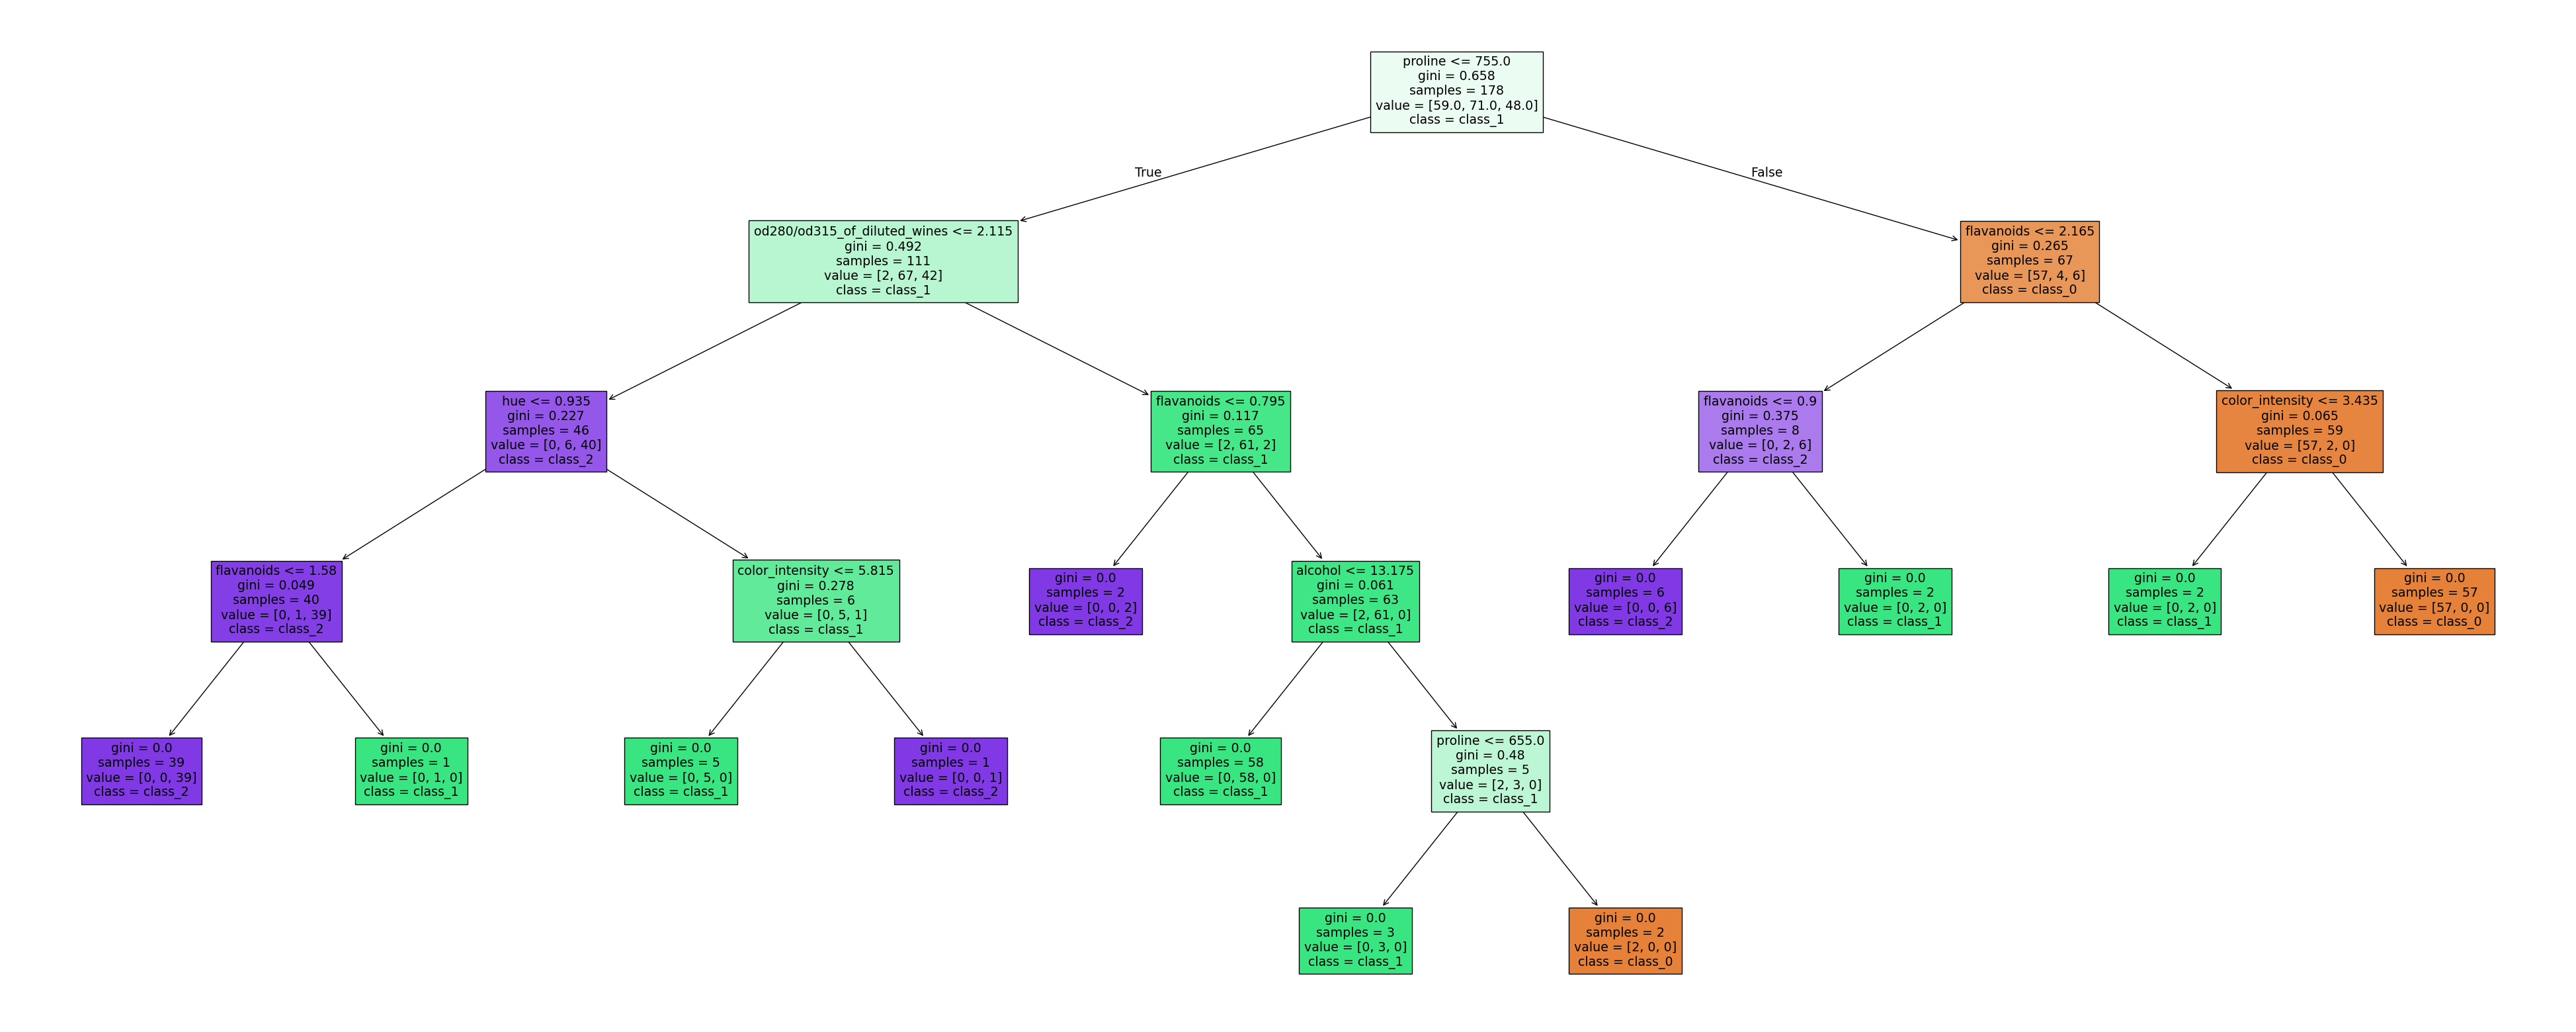

In [ ]:
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=dataset["feature_names"],
class_names=dataset["target_names"], filled=True)
plt.show()

* Predicciones

In [ ]:
y_p = clf.predict(X)
print(accuracy_score(y, y_p))

#Prueba sobre los datos de entrenamiento (Nada recomendable)

1.0


# **Tarea: 6.1 División del Conjunto en Train y Test**

## **6.1.1 Cargar la librería para la división de datos**

  * Para solucionar el problema de la memorización del árbol en lugar del aprendizaje tenemos que dividir los datos, un conjunto para entrenamiento y uno para prueba.

  * Una vez cargada la librería (from sklearn.model_selection import train_test_split) procedemos con la división de los datos.

  * Vamos a seleccionar el 80% de los datos para entrenamiento y 20% para prueba. Para índicar esto en nuestra función, indicamos: "test_size = 0.2" (el tamaño del conjunto de prueba es del 20%)

## **6.1.2 Opciones de división de datos**

### 1. Iniciamos con

```
shuffle = False
```

* Este parametro no mezclara los valores, tomara el 20% directamente de como esten distribuidos los valores originales

* Si como en nuestro caso los valores están ya ordenados por clases, entonces, está opción podria no ser muy ventajosa

* Esto se debe a que la prueba se hara (nuevamente hablando de nuestro caso) únicamente sobre objetos de la clase 2

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, shuffle=False)
print(y)
print(y_train_1)
print(y_test_1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### 2. Seguimos con

```
shuffle = True
```

* Este parametro mezclara los valores

* A comparación del anterior método, este es mejor para nuestros entrenamientos y pruebas, pues el entrenamiento y la prueba se harán sobre objetos de las tres clases

* Cabe aclarar que los datos serán seleccionados de manera completamente aleatoria

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, shuffle=True, random_state= 42)
print(y)
print(y_train_2)
print(y_test_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1
 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 1 1 0 1 2 2 1 2 1
 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 1 2 2 1 0 0 1 2 2 0 1 2 2 2 2 1 0
 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 1]
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]


### 3. Finalizamos con

```
stratify = y
```

* Este parametro dividira los conjuntos de prueba y entrenamiento proporcionalmente

* Para nuestro caso este es el **mejor parametro**, pues nuestras clases están desbalanceadas

* En el caso aleatorio tenemos menos probabilidades de entrenar y/o probar con menos elementos de la clase 0 o 2 que de la clase 1

* Este nos ayudara a entrenar y probar con la misma proporción cada una de las variables.

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, stratify=y)
print(y)
print(y_train_3)
print(y_test_3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 1 1 1 0 0 0 2 1 1 2 0 1 2 2 1 0 1 1 1 2 0 2 0 0 2 1 1 2 0 0 0 0 0 2 0 0
 1 2 1 0 0 1 1 0 0 0 2 0 1 0 1 2 1 0 0 0 1 1 1 2 1 0 1 0 1 1 0 1 1 2 2 0 1
 1 1 2 2 0 0 1 2 0 1 2 2 0 1 2 2 2 1 0 0 1 0 2 0 1 1 1 1 2 1 2 1 1 0 2 1 0
 1 1 1 2 0 2 2 1 0 2 1 1 2 0 1 2 1 1 2 1 2 1 0 0 0 1 0 2 2 0 1]
[0 1 1 1 0 1 0 2 1 1 0 2 1 1 1 1 1 2 0 2 0 2 1 0 0 2 1 0 0 2 0 1 2 2 2 0]


## **6.1.3 Análisis de las subconjuntos creados**

 * Procedemos a contar los elementos de cada clase en los conjuntos de entrenamiento y prueba, y sus porcentajes de aparición

 * Al ser arreglos de *numpy* cada uno de nuestros subconjuntos usaremos la función:

```
numpy.unique('arrglo numpy' return_counts = True)
```




### 1. Análisis para:

```
shuffle = False
```

In [ ]:
unic_train_1, count_train_1 = np.unique(y_train_1, return_counts=True)
unic_test_1, count_test_1 = np.unique(y_test_1, return_counts=True)

print('Las clases incluidas en el arrgelo de entrenamiento son:', unic_train_1, 'y su cantidad por clase es:' , count_train_1)
print('Las clases incluidas en el arrgelo de prueba son:', unic_test_1, 'y su cantidad por clase es:' , count_test_1)

Las clases incluidas en el arrgelo de entrenamiento son: [0 1 2] y su cantidad por clase es: [59 71 12]
Las clases incluidas en el arrgelo de prueba son: [2] y su cantidad por clase es: [36]


* Su porcentaje de aparición:

In [ ]:
por_train_1 = count_train_1/len(y_train_1)*100
por_test_1 = count_test_1/len(y_test_1)*100

print("El porcentaje de aparición de cada clase en el arreglo de entrenamiento es:")
for clase, porcentaje in enumerate(por_train_1):
    print(f"Clase {clase}: {porcentaje:.2f}%")

print("\nEl porcentaje de aparición de cada clase en el arreglo de prueba es:")
for clase, porcentaje in enumerate(por_test_1):
    print(f"Clase {2}: {porcentaje:.2f}%")

El porcentaje de aparición de cada clase en el arreglo de entrenamiento es:
Clase 0: 41.55%
Clase 1: 50.00%
Clase 2: 8.45%

El porcentaje de aparición de cada clase en el arreglo de prueba es:
Clase 2: 100.00%


* Al tener en el conjunto de entrenamiento tan pocos datos de la clase 2 y en el conjunto de prueba el 100% de la clase 2 es fácil ver desde ahora que no tendra buenos resultados





### 2. Análisis para:


```
shuffle = True
```

In [ ]:
unic_train_2, count_train_2 = np.unique(y_train_2, return_counts=True)
unic_test_2, count_test_2 = np.unique(y_test_2, return_counts=True)

print('Las clases incluidas en el arrgelo de entrenamiento son:', unic_train_2, 'y su cantidad por clase es:' , count_train_2)
print('Las clases incluidas en el arrgelo de prueba son:', unic_test_2, 'y su cantidad por clase es:' , count_test_2)

Las clases incluidas en el arrgelo de entrenamiento son: [0 1 2] y su cantidad por clase es: [45 57 40]
Las clases incluidas en el arrgelo de prueba son: [0 1 2] y su cantidad por clase es: [14 14  8]


* Su porcentaje de aparición:

In [ ]:
por_train_2 = count_train_2/len(y_train_2)*100
por_test_2 = count_test_2/len(y_test_2)*100

print("El porcentaje de aparición de cada clase en el arreglo de entrenamiento es:")
for clase, porcentaje in enumerate(por_train_2):
    print(f"Clase {clase}: {porcentaje:.2f}%")

print("\nEl porcentaje de aparición de cada clase en el arreglo de prueba es:")
for clase, porcentaje in enumerate(por_test_2):
    print(f"Clase {clase}: {porcentaje:.2f}%")

El porcentaje de aparición de cada clase en el arreglo de entrenamiento es:
Clase 0: 31.69%
Clase 1: 40.14%
Clase 2: 28.17%

El porcentaje de aparición de cada clase en el arreglo de prueba es:
Clase 0: 38.89%
Clase 1: 38.89%
Clase 2: 22.22%


* Con este tipo de selección nuestros conjuntos incluyen todas las clases





### 3. Análisis para:


```
stratify = y
```

In [ ]:
unic_train_3, count_train_3 = np.unique(y_train_3, return_counts=True)
unic_test_3, count_test_3 = np.unique(y_test_3, return_counts=True)

print('Las clases incluidas en el arrgelo de entrenamiento son:', unic_train_3, 'y su cantidad por clase es:' , count_train_3)
print('Las clases incluidas en el arrgelo de prueba son:', unic_test_3, 'y su cantidad por clase es:' , count_test_3)

Las clases incluidas en el arrgelo de entrenamiento son: [0 1 2] y su cantidad por clase es: [47 57 38]
Las clases incluidas en el arrgelo de prueba son: [0 1 2] y su cantidad por clase es: [12 14 10]


In [ ]:
por_train_3 = count_train_3/len(y_train_3)*100
por_test_3 = count_test_3/len(y_test_3)*100

print("El porcentaje de aparición de cada clase en el arreglo de entrenamiento es:")
for clase, porcentaje in enumerate(por_train_3):
    print(f"Clase {clase}: {porcentaje:.2f}%")

print("\nEl porcentaje de aparición de cada clase en el arreglo de prueba es:")
for clase, porcentaje in enumerate(por_test_3):
    print(f"Clase {clase}: {porcentaje:.2f}%")

El porcentaje de aparición de cada clase en el arreglo de entrenamiento es:
Clase 0: 33.10%
Clase 1: 40.14%
Clase 2: 26.76%

El porcentaje de aparición de cada clase en el arreglo de prueba es:
Clase 0: 33.33%
Clase 1: 38.89%
Clase 2: 27.78%


* Notemos que la proporción entre los datos seleccionados para el entrenamiento y para el test son muy similares

+ Su ligera variación se debe a que la cantidad de elementos es un número entero

## **6.1.4 Entrenamiento de los módelos con los nuevos subconjuntos**

### 1. Modelo para:

```
shuffle = False
```



In [ ]:
clf_1 = DecisionTreeClassifier()
clf_1.fit(X_train_1, y_train_1)

DecisionTreeClassifier()

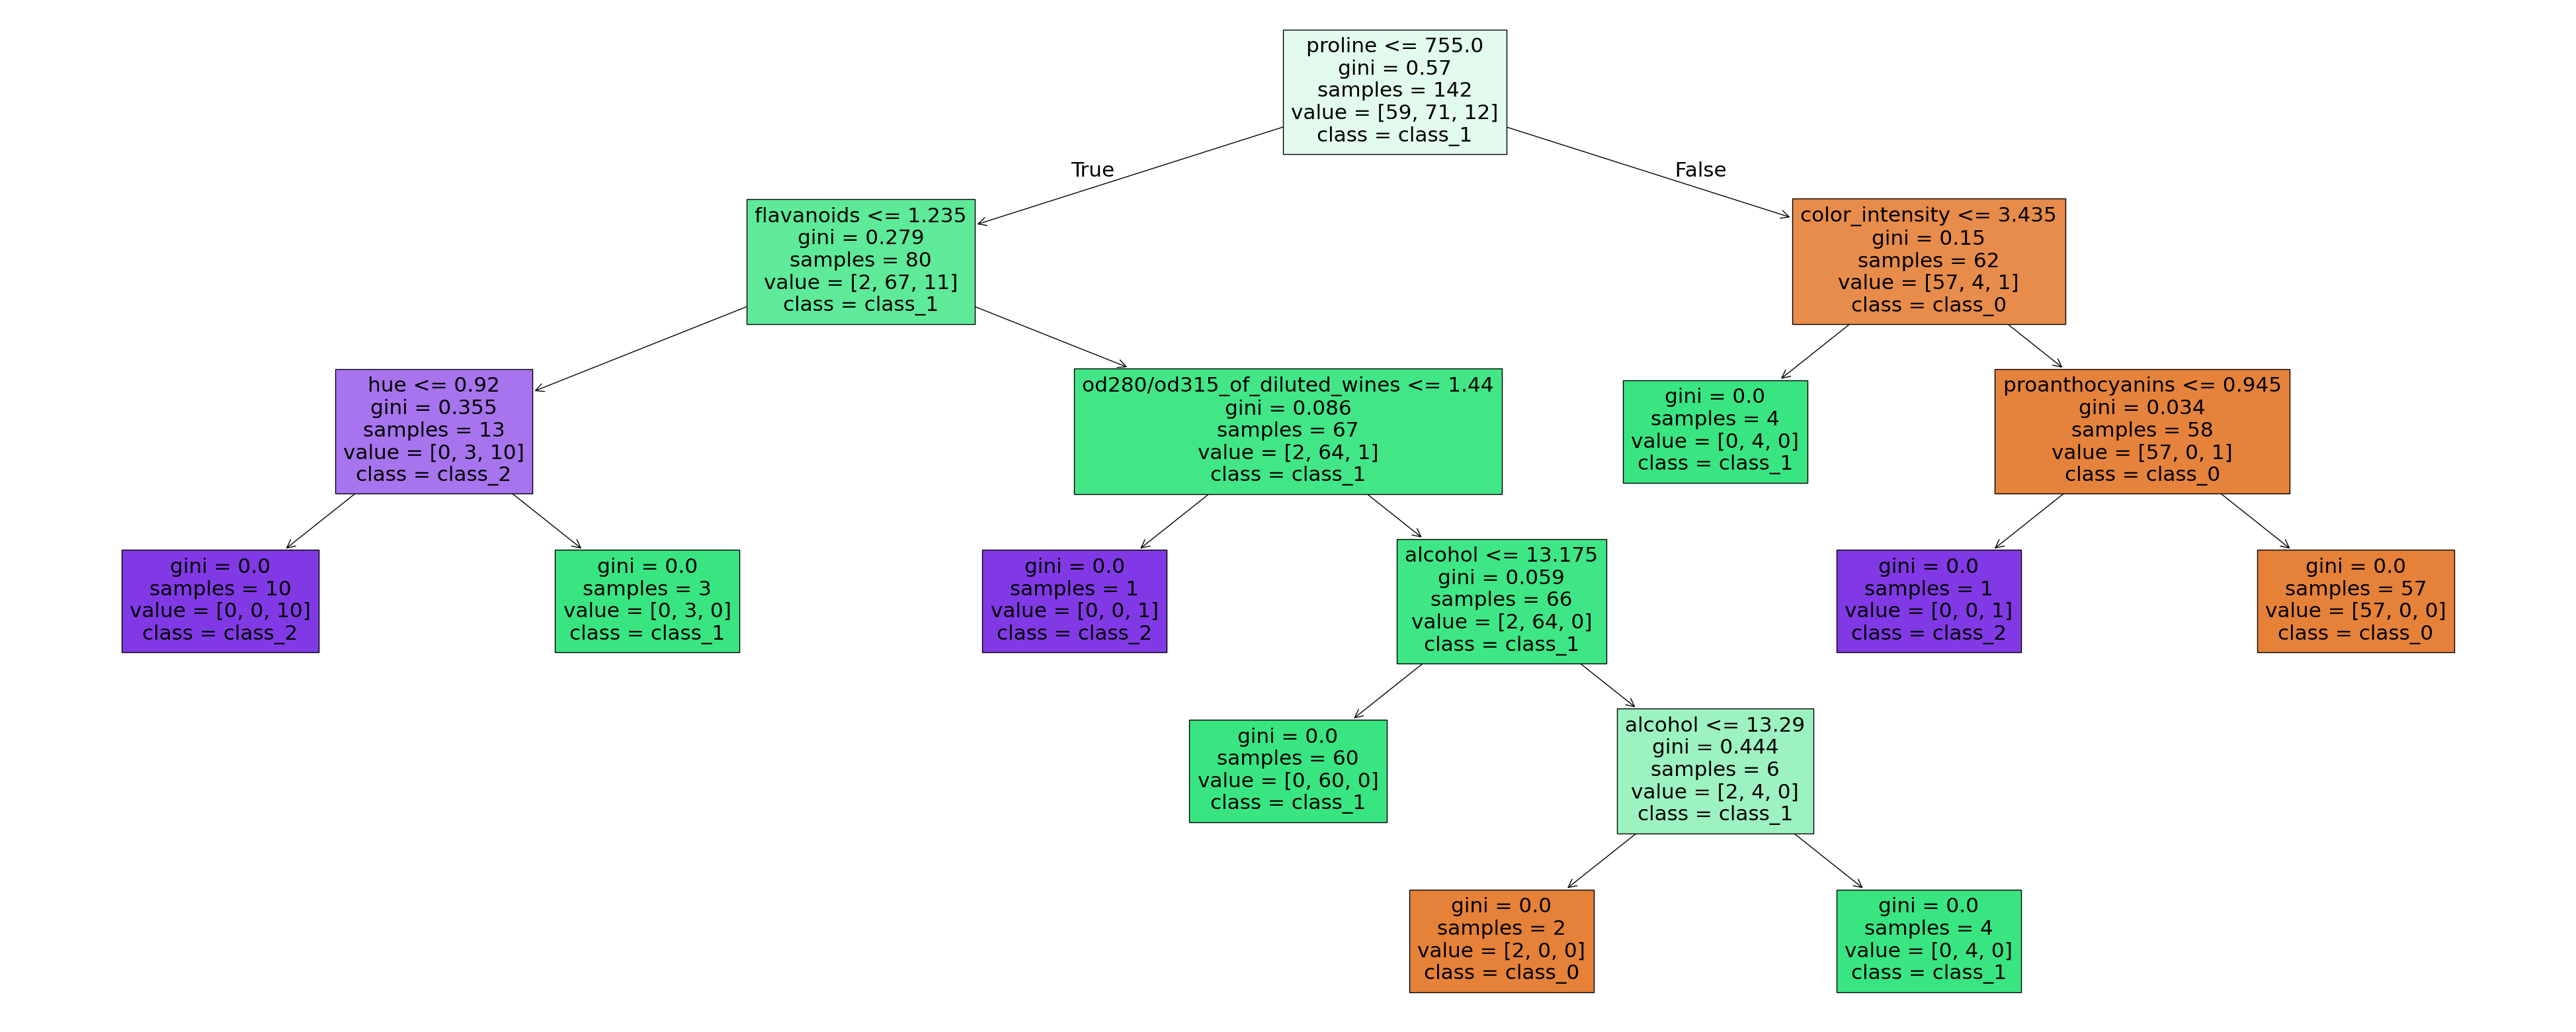

In [ ]:
plt.figure(figsize=(50, 20))
plot_tree(clf_1, feature_names=dataset["feature_names"],
class_names=dataset["target_names"], filled=True)
plt.show()

In [ ]:
y_p_1 = clf_1.predict(X_test_1)
print(accuracy_score(y_test_1, y_p_1))

0.7777777777777778


### 2. Modelo para:

```
shuffle = True
```

In [ ]:
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train_2, y_train_2)

DecisionTreeClassifier()

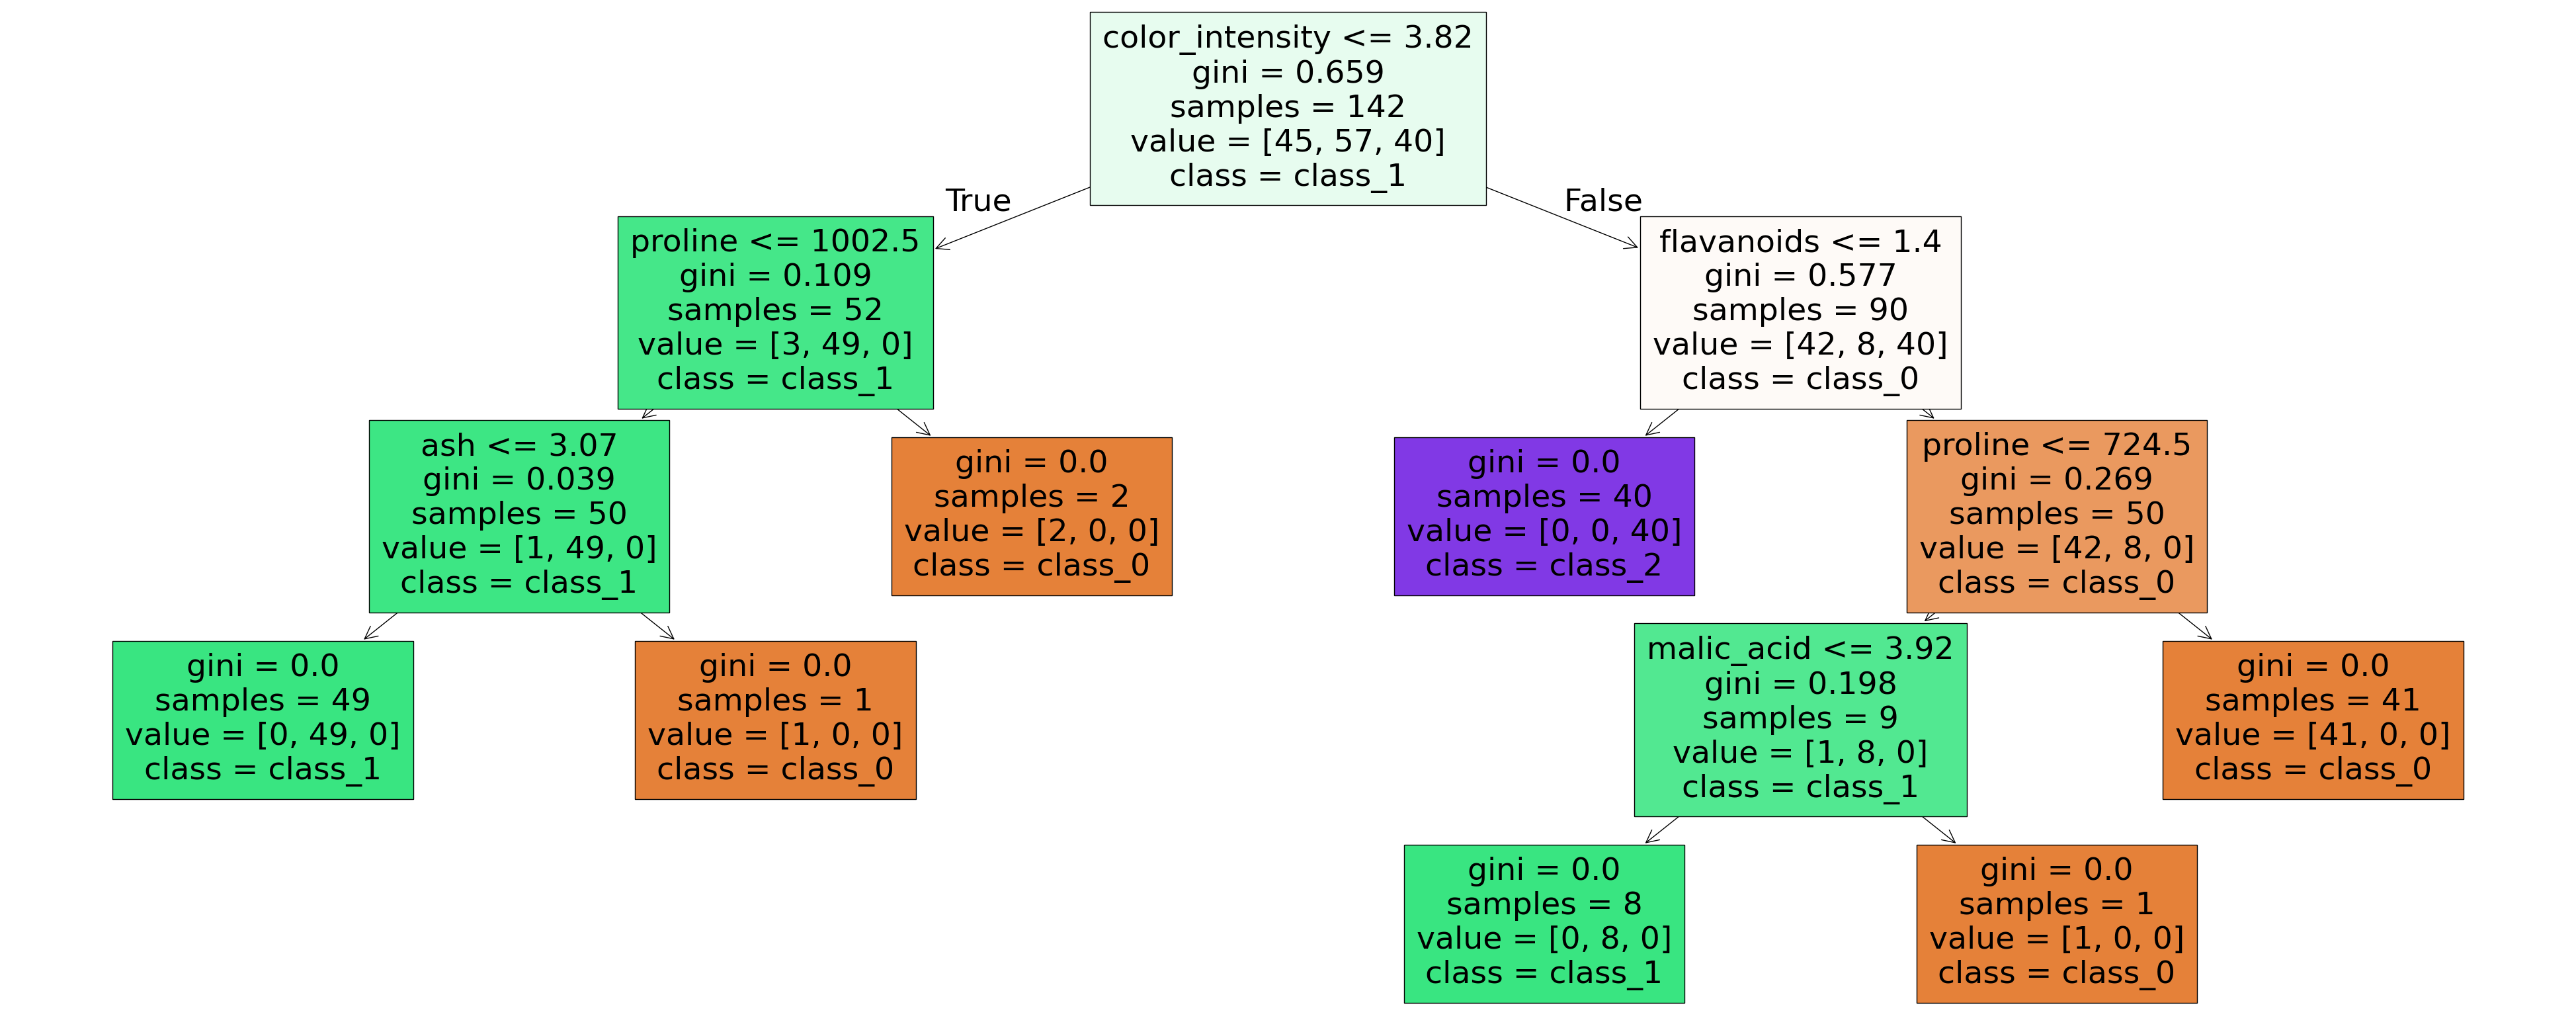

In [ ]:
plt.figure(figsize=(50, 20))
plot_tree(clf_2, feature_names=dataset["feature_names"],
class_names=dataset["target_names"], filled=True)
plt.show()

In [ ]:
y_p_2 = clf_2.predict(X_test_2)
print(accuracy_score(y_test_2, y_p_2))

0.9444444444444444


### 3. Modelo para:

```
stratify = y
```

In [ ]:
clf_3 = DecisionTreeClassifier()
clf_3.fit(X_train_3, y_train_3)

DecisionTreeClassifier()

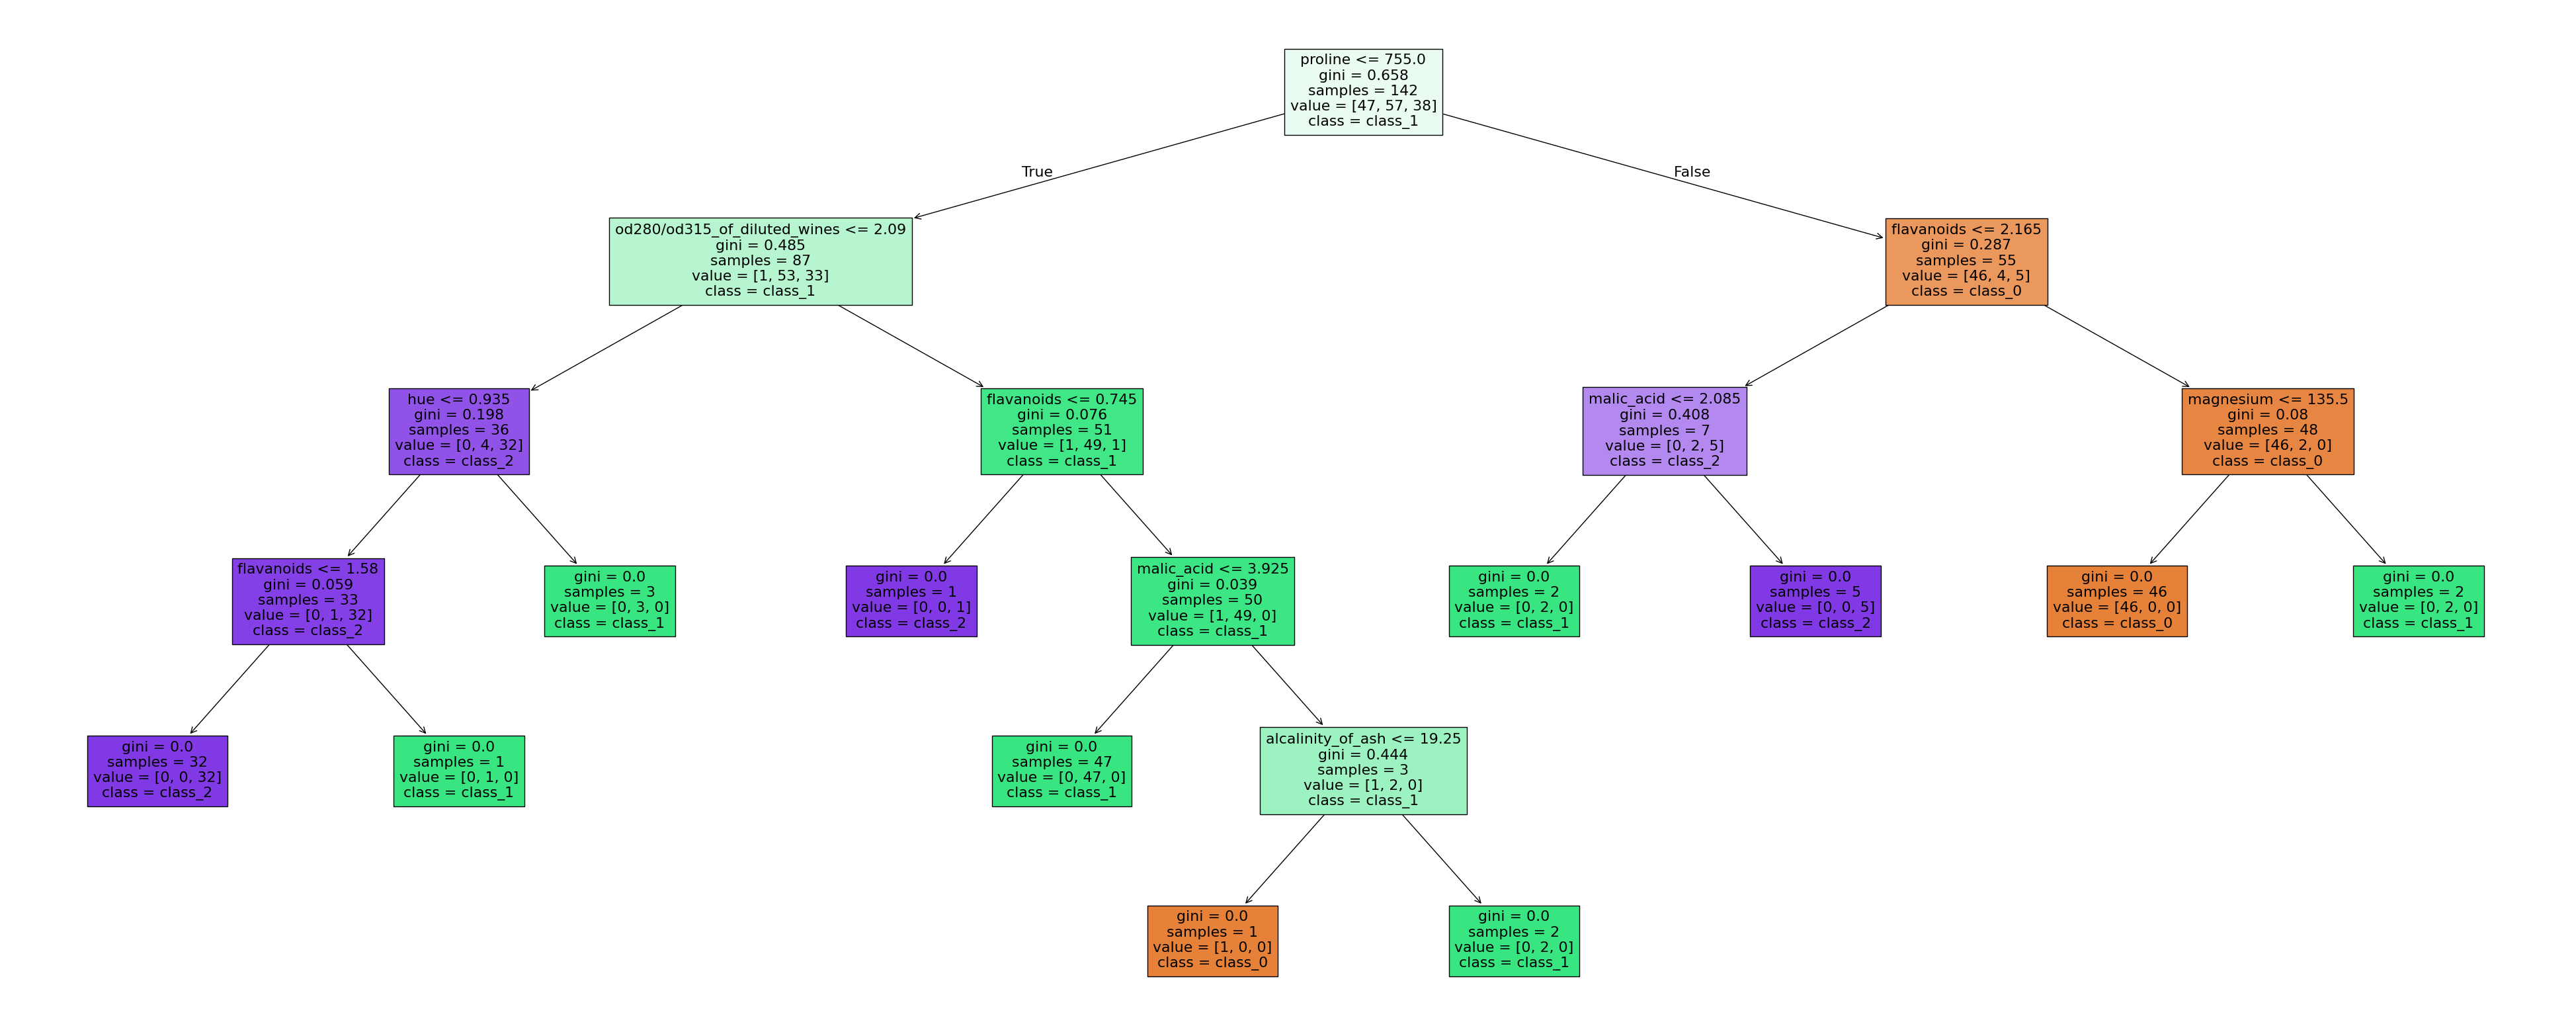

In [ ]:
plt.figure(figsize=(50, 20))
plot_tree(clf_3, feature_names=dataset["feature_names"],
class_names=dataset["target_names"], filled=True)
plt.show()

In [ ]:
y_p_3 = clf_3.predict(X_test_3)
print(accuracy_score(y_test_3, y_p_3))

0.9444444444444444


### 4. Preguntas

* ¿Cuál valor es más razonable?

  * El valor dado por la división "shuffle = False" esta artficialmente disminuido, pues se entrena con pocos datos de la clase 2 y se prueba con datos unicamente de clase de 2. No representa verdaderamente el rendimiento del metodo.

    * Podemos ver que para el conjunto de prueba tenemos 100% de elementos de la clase 2 y nos da un accuracy del 77.7%

  * Para "stratify = y" la metrica "accuracy" mejora, pero sigue siendo baja respecto a lo esperado

    + Tiene un accuracy del 88%

  * El caso "shuffle =True" es el más razonable pues permite al modelo acceder a datos dónde:

    + No haya patrones ocultos en el orden de los datos que puedan afectar la división.

    + Ambos conjuntos (entrenamiento y prueba) tengan una distribución similar de clases y características.

    * Esto lo vemos reflejado en us accuracy de 91.6%, superior al de "stratify = y"



* ¿En qué casos es crítico utilizar "stratify=y" y cuándo no es tan importante?

  + Es crítico usar "stratify = y" cuando los datos están desbalanceados en gran proporción, es decir, cuando tenemos un vólumen notablemente mayor de una variable respecto a otras, pues es necesario entrenar y testear en proporción el modelo para que los resultados sean razonables o una buena representación de su eficiencia.

  * No es tan importante cuando hablamos de un problema balanceado o mínimamente desbalanceado, al tener la misma cantidad de datos de cada clase no existira ninguna disminución o aumento artificial del "accuracy" del modelo.

# **6.2 Evaluación de Métricas**

* Usaremos


```
classification_report
```

* Es conveninete esta elección pues estamos trabajando un problema multiclase

# **Tarea: 6.3 Ajuste de Parámetros**

* Iniciamos entonces construyendo nuesto diccionario con unicamente los parametros sugeridos por el profesor:

In [ ]:
parametros = {
    # Profundidad máxima del arbol
    "max_depth": [2, 4, 6, 8, 10],
    #Reducción mínima de impureza para dividir un nodo
    "min_impurity_decrease": [0, 0.01, 0.03, 0.07, 0.09, 0.11]
}
configuraciones = []
for configuracion in ParameterGrid(parametros):
    print(configuracion)
    configuraciones.append(configuracion)
print('\nCon los parametros escogidos tenemos un total de', len(configuraciones), 'configuraciones')

{'max_depth': 2, 'min_impurity_decrease': 0}
{'max_depth': 2, 'min_impurity_decrease': 0.01}
{'max_depth': 2, 'min_impurity_decrease': 0.03}
{'max_depth': 2, 'min_impurity_decrease': 0.07}
{'max_depth': 2, 'min_impurity_decrease': 0.09}
{'max_depth': 2, 'min_impurity_decrease': 0.11}
{'max_depth': 4, 'min_impurity_decrease': 0}
{'max_depth': 4, 'min_impurity_decrease': 0.01}
{'max_depth': 4, 'min_impurity_decrease': 0.03}
{'max_depth': 4, 'min_impurity_decrease': 0.07}
{'max_depth': 4, 'min_impurity_decrease': 0.09}
{'max_depth': 4, 'min_impurity_decrease': 0.11}
{'max_depth': 6, 'min_impurity_decrease': 0}
{'max_depth': 6, 'min_impurity_decrease': 0.01}
{'max_depth': 6, 'min_impurity_decrease': 0.03}
{'max_depth': 6, 'min_impurity_decrease': 0.07}
{'max_depth': 6, 'min_impurity_decrease': 0.09}
{'max_depth': 6, 'min_impurity_decrease': 0.11}
{'max_depth': 8, 'min_impurity_decrease': 0}
{'max_depth': 8, 'min_impurity_decrease': 0.01}
{'max_depth': 8, 'min_impurity_decrease': 0.03}
{'ma

* Ya que hemos construido todas las combinaciones posibles de parametros sugeridos procedemos a revisar cual de ellas es la que nos da la mayor precisión.

In [ ]:
accuracy = []
for configuracion in configuraciones:
    clf = DecisionTreeClassifier(**configuracion)
    clf.fit(X_train_2, y_train_2)
    y_p_c = clf.predict(X_test_2)
    accuracy.append(accuracy_score(y_test_2, y_p_c))

print("La configuración con mayor precisión es:" , configuraciones[np.argmax(accuracy)], ':\n')
print(accuracy[np.argmax(accuracy)])

La configuración con mayor precisión es: {'max_depth': 4, 'min_impurity_decrease': 0} :

0.9444444444444444


# **6.4 Validación Cruzada**

In [ ]:
from sklearn.model_selection import KFold

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

kf = KFold(5, shuffle = True, random_state = 42)
for indices_t, indices_v in kf.split(X_train_valid):
  X_train = X_train_valid[indices_t]
  X_valid = X_train_valid[indices_v]
  y_train = y_train_valid[indices_t]
  y_valid = y_train_valid[indices_v]

In [ ]:
best_config = {'max_depth': 4, 'min_impurity_decrease': 0}

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
accuracies = []
fold_sizes = []

for train_idx, valid_idx in kf.split(X_train_valid):
    X_train, X_valid = X_train_valid[train_idx], X_train_valid[valid_idx]
    y_train, y_valid = y_train_valid[train_idx], y_train_valid[valid_idx]

    # Entrenar modelo con la mejor configuración
    clf = DecisionTreeClassifier(**best_config, random_state=123)
    clf.fit(X_train, y_train)

    # Evaluar en el fold de validación
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)

    accuracies.append(acc)
    fold_sizes.append(len(valid_idx))

# Precisión promedio ponderada
weighted_avg_accuracy = np.average(accuracies, weights=fold_sizes)
print(f"Precisión promedio ponderada (K-Fold CV): {weighted_avg_accuracy:.4f}")
print(f"Precisión en test (ejercicio anterior): 0.9444")

Precisión promedio ponderada (K-Fold CV): 0.9085
Precisión en test (ejercicio anterior): 0.9444
